In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('diabetes_data.csv', sep = ';')
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [4]:
#computing the number of 0 values in each column
for column_name, column in df.transpose().iterrows():
    print (column_name)
    print(df[[column_name]].eq(0).sum().sum())

age
0
gender
0
polyuria
262
polydipsia
287
sudden_weight_loss
303
weakness
215
polyphagia
283
genital_thrush
404
visual_blurring
287
itching
267
irritability
394
delayed_healing
281
partial_paresis
296
muscle_stiffness
325
alopecia
341
obesity
432
class
200


In [5]:
df['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

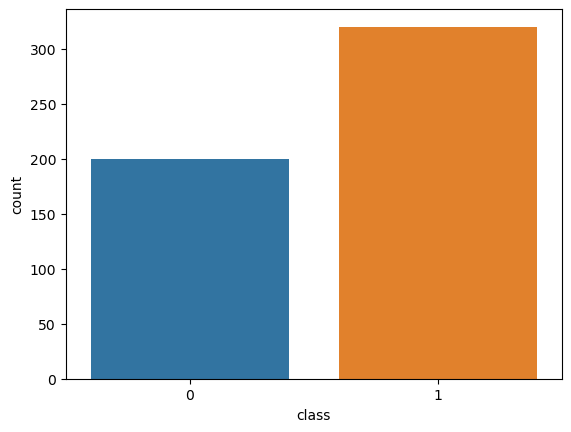

In [6]:
#distribution of positive diagonosis
sns.countplot(data = df,x='class')
plt.show()

In [7]:
df['gender'].value_counts()

Male      328
Female    192
Name: gender, dtype: int64

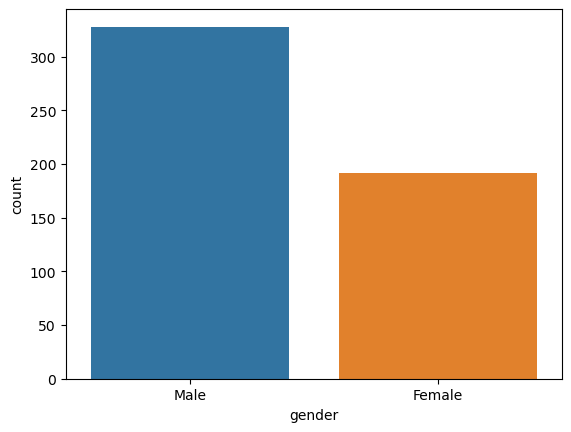

In [8]:
#distribution of gender
sns.countplot(data = df,x='gender')
plt.show()

In [9]:
# distribution of diagnosis as per gender
males_diabetic = df[(df["gender"].str.contains("Male")) & (df["class"]==1)].shape[0]
print("Males diagnosed with diabetes: "+ str(males_diabetic))
females_diabetic = df[(df["gender"].str.contains("Female")) & (df["class"]==1)].shape[0]
print("Females diagnosed with diabetes: "+ str(females_diabetic))

Males diagnosed with diabetes: 147
Females diagnosed with diabetes: 173


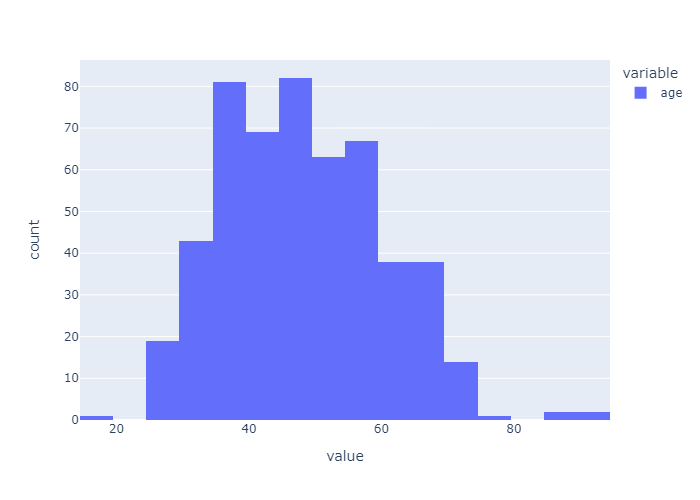

In [10]:
# distribution of age
fig = px.histogram(df["age"],nbins=20)
fig.show("png")

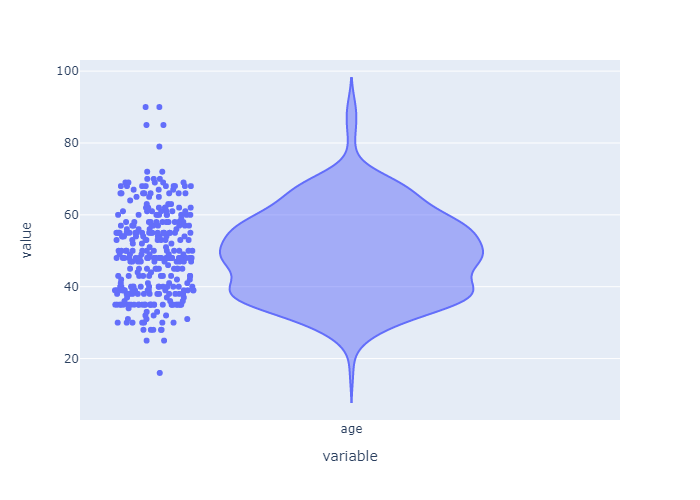

In [11]:
# For diagonsed patients distribution of age 
fig1 = px.violin(df.query("`class` == 1")["age"],points = "all")
fig1.show("png")

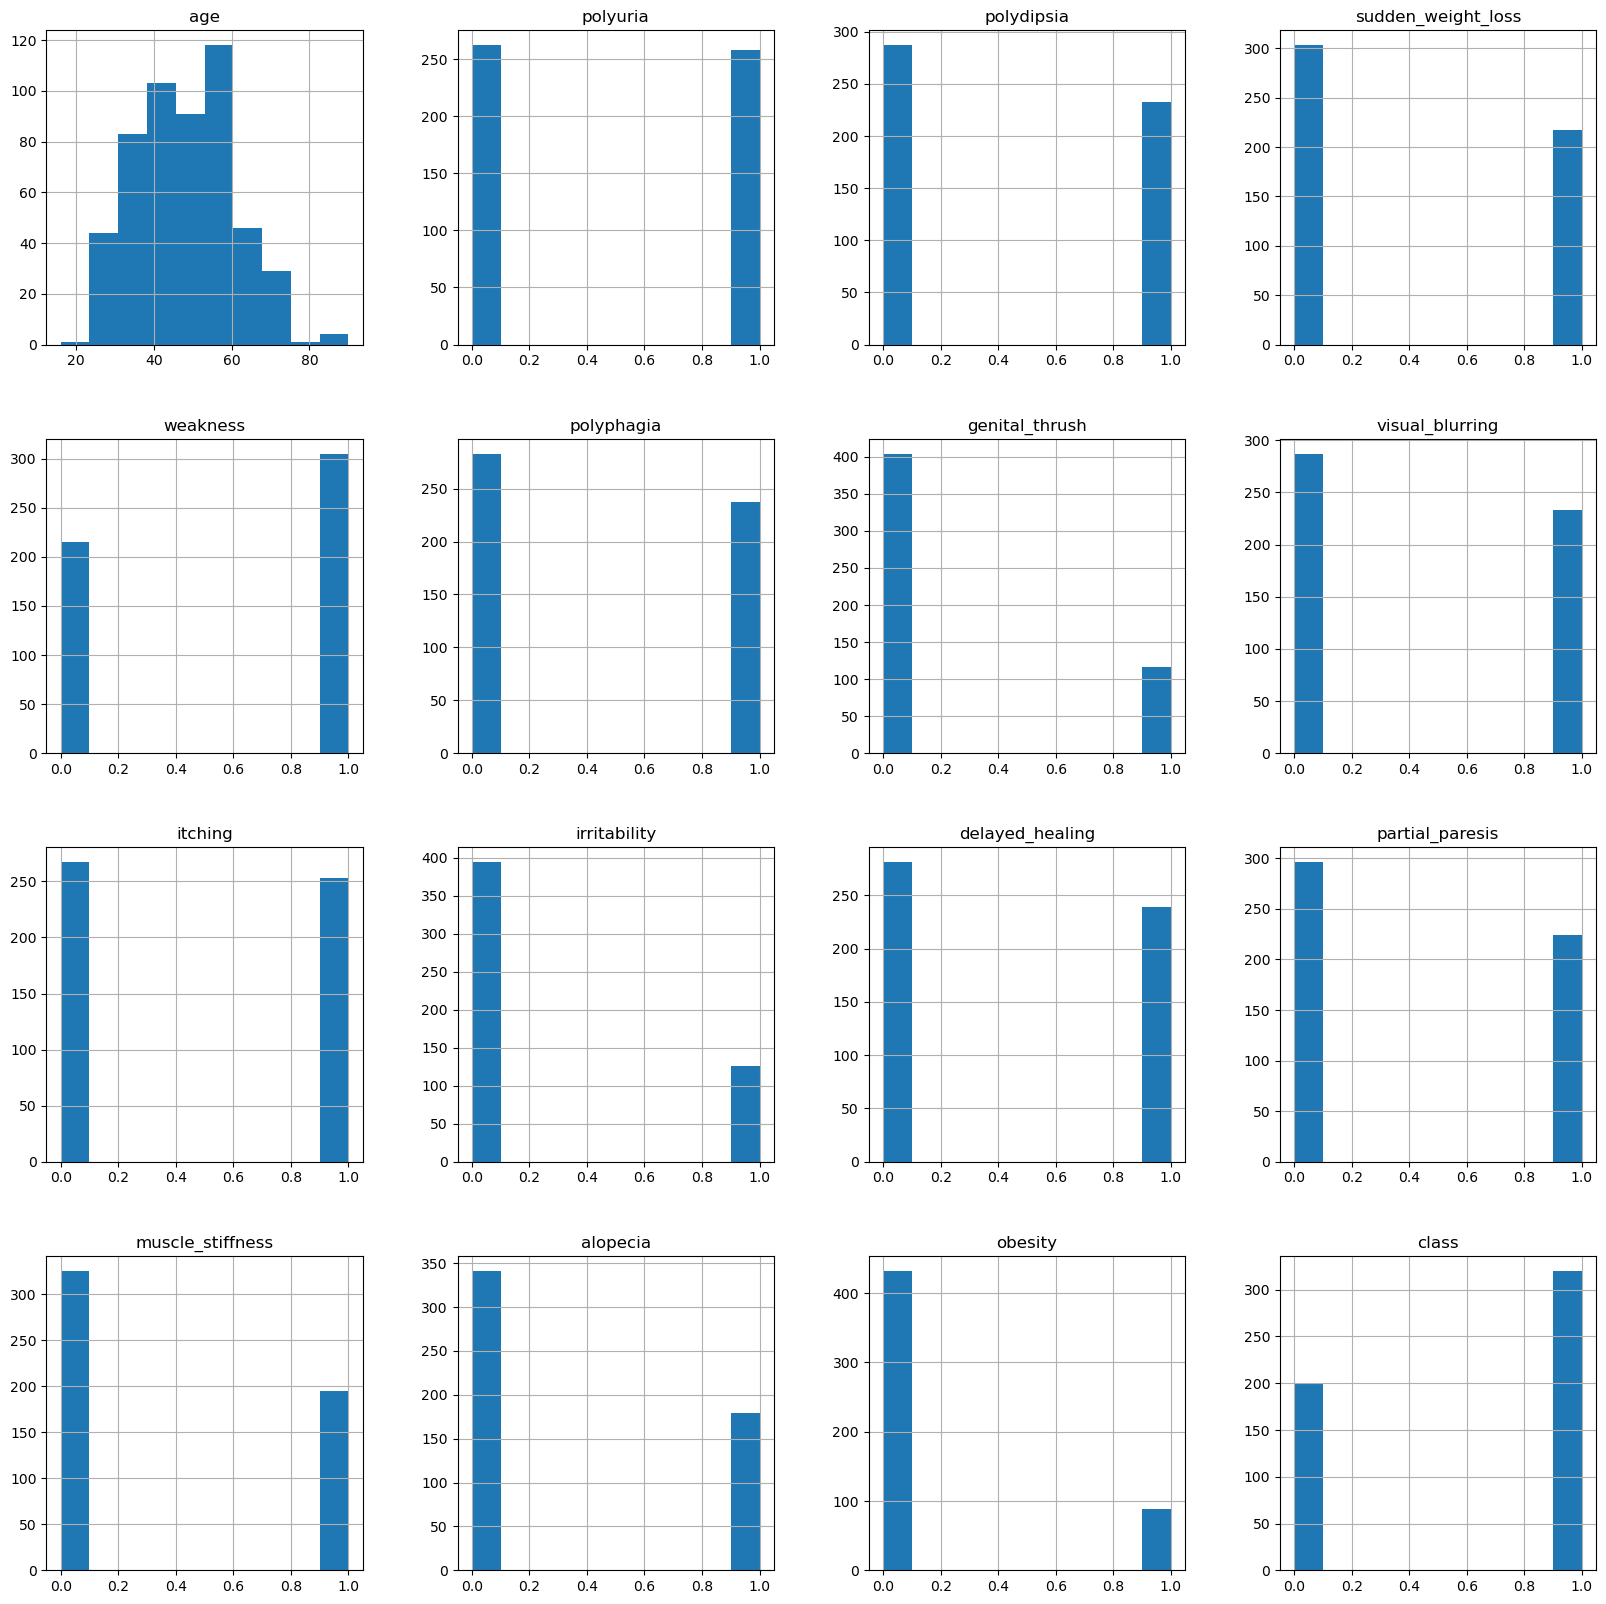

In [77]:
p = df.hist(figsize = (20,20))

In [70]:
df.corr()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
polyuria,0.199781,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384
irritability,0.201625,0.237740,0.203446,0.140340,0.146698,0.239466,0.160551,0.077095,0.114006,1.000000,0.126877,0.151571,0.201637,0.043708,0.127801,0.299467


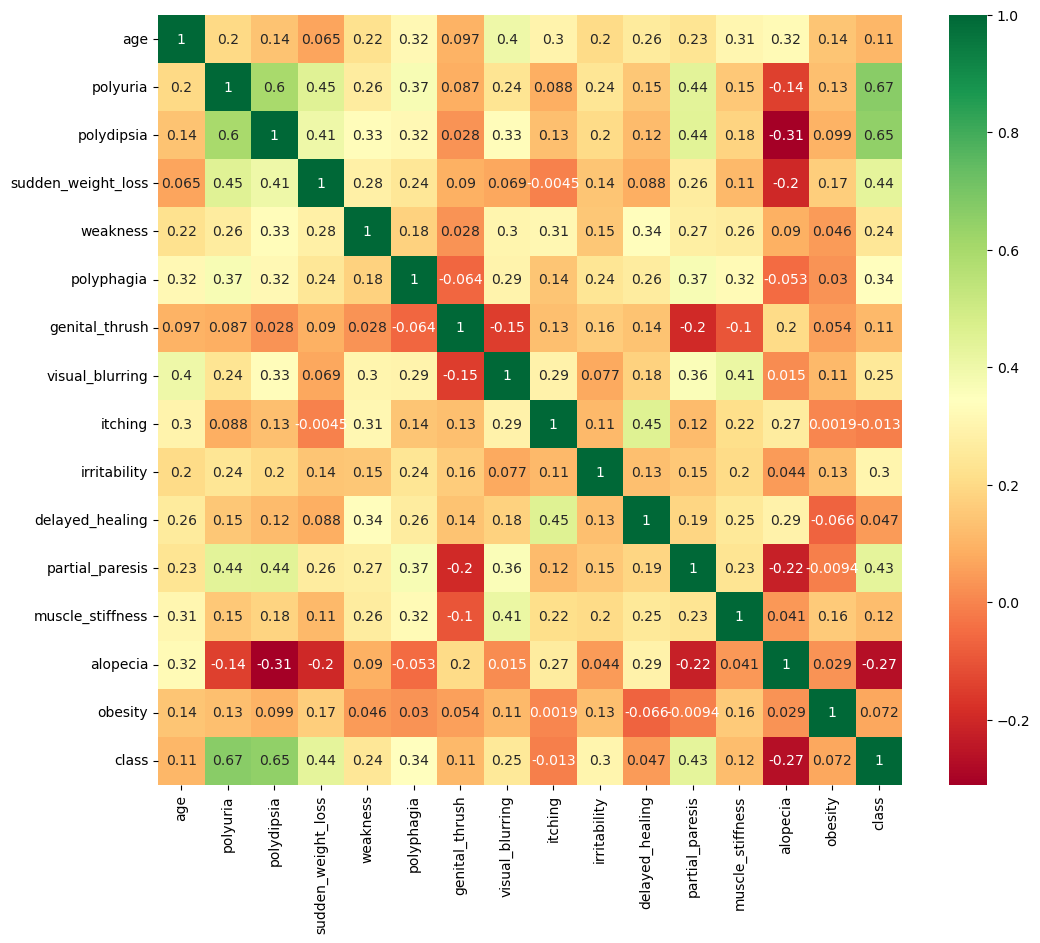

In [80]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

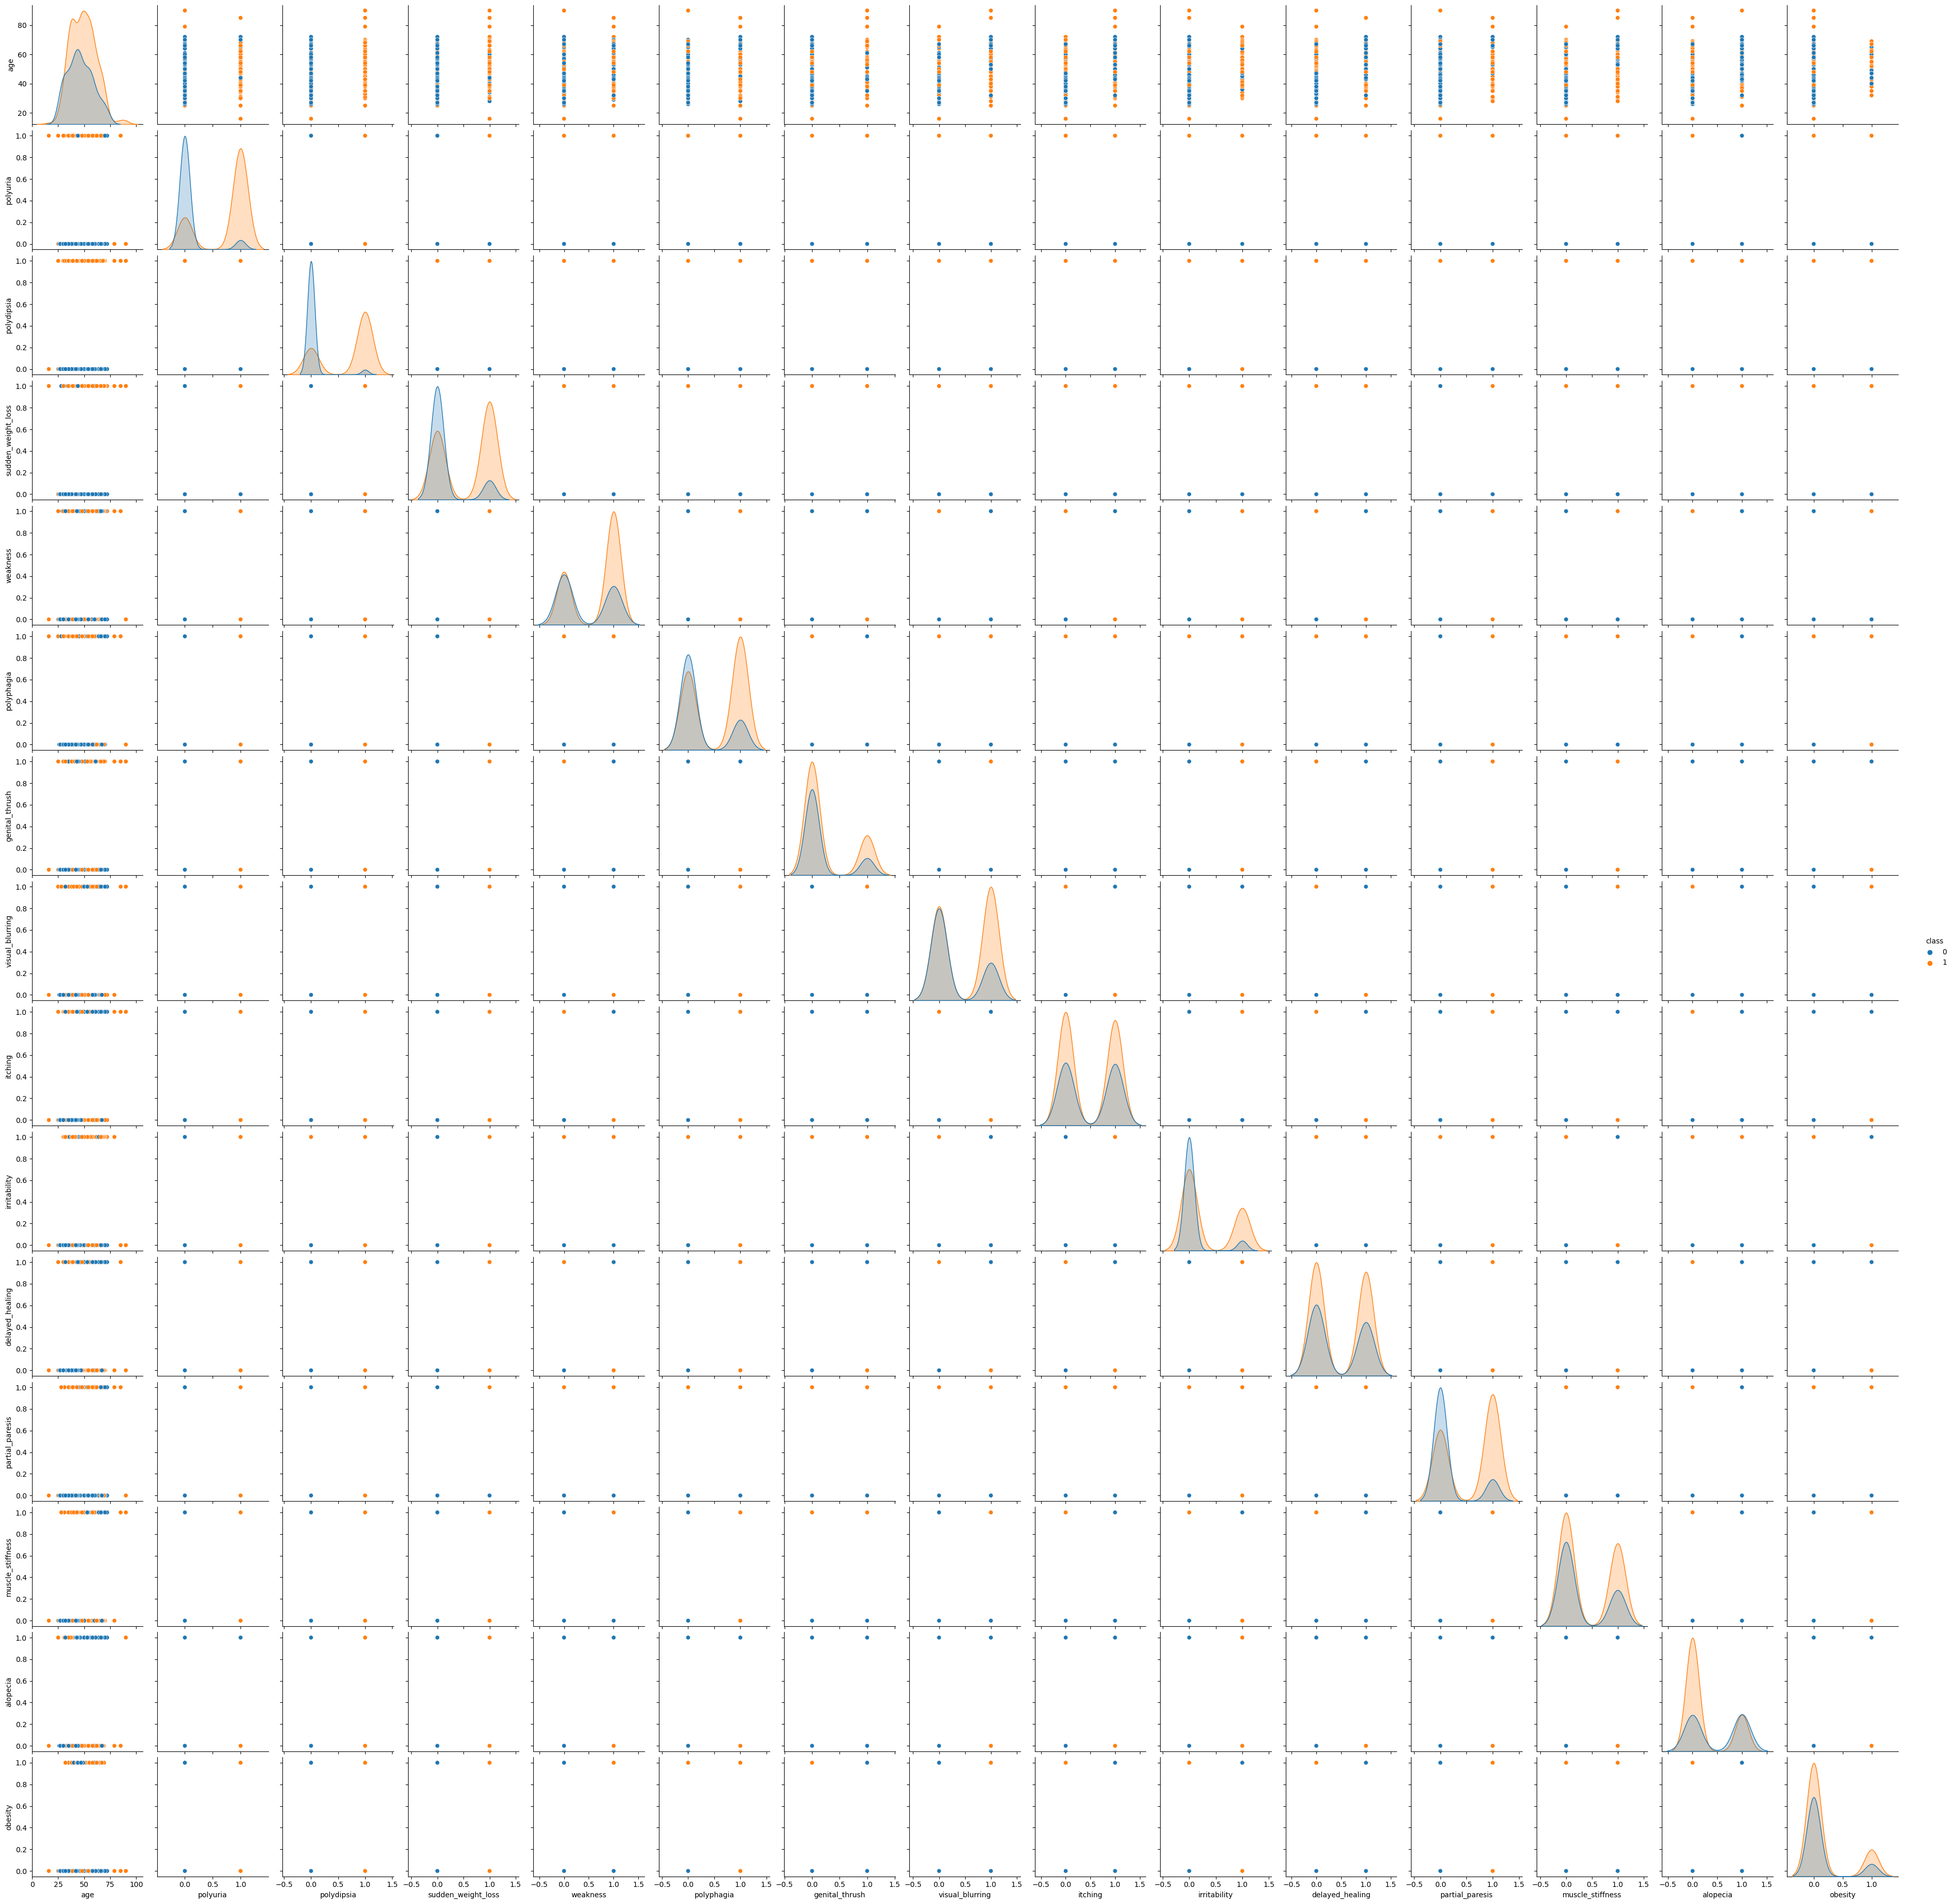

In [73]:
sns.pairplot(df,hue='class')

In [96]:
#converting categorical data gender into numeric
# gender
# Convert "Male" to 1  "Female" to 2 
df['gender'] = df['gender'].map({'Male': 1, 'Female': 2})
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [97]:
#split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis = 1),df['class'],random_state = 42)

In [98]:
#determining the baseline score for the classifier by using the DummyClassifier with the training data
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.6461538461538462


In [99]:
#building a basic logistic regression model
logreg = LogisticRegression()
logreg_start_time = time.time()
logreg.fit(X_train, y_train)
logreg_elapsed_time = time.time() - logreg_start_time 

In [100]:
#scoring the model
#Predicting the test results and calculating the accuracy of logistic regression model

y_logreg_hat_train = logreg .predict(X_train)
y_logreg_hat_test = logreg .predict(X_test)

lrg_train_acc = logreg.score(X_train, y_train)
lrg_test_acc = logreg.score(X_test, y_test)

print(f'Training Accuracy: {lrg_train_acc: .2f}')
print(f'Test Accuracy: {lrg_test_acc: .2f}')

Training Accuracy:  0.92
Test Accuracy:  0.93


In [101]:
#classification report
print(classification_report(y_test, y_logreg_hat_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.94      0.95      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130



In [102]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_logreg_hat_test)
print(confusion_matrix)

[[41  5]
 [ 4 80]]


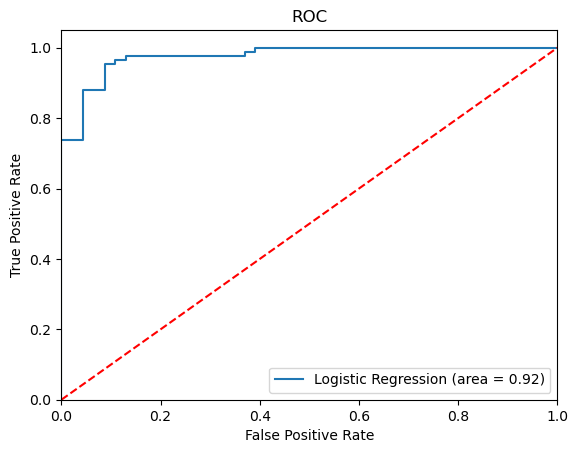

In [103]:
# ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg .predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg .predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [104]:
#Model Comparisons
#Building KNN model
knn = KNeighborsClassifier()
knn_start_time = time.time()
knn.fit(X_train, y_train)
knn_elapsed_time = time.time() - knn_start_time 

In [105]:
#Predicting the test results and calculating the accuracy of knn model

y_knn_hat_train = knn.predict(X_train)
y_knn_hat_test = knn.predict(X_test)


kn_train_acc = knn.score(X_train, y_train)
kn_test_acc = knn.score(X_test, y_test)

print(f'Training Accuracy: {kn_train_acc: .2f}')
print(f'Test Accuracy: {kn_test_acc: .2f}')

Training Accuracy:  0.92
Test Accuracy:  0.85


In [106]:
#Building a Decision Tree model
tree = DecisionTreeClassifier()
tree_start_time = time.time()
tree.fit(X_train, y_train)
tree_elapsed_time = time.time() - tree_start_time 

In [107]:
#Predicting the test results and calculating the accuracy of decision tree model

y_tree_hat_train = tree.predict(X_train)
y_tree_hat_test = tree.predict(X_test)

tree_train_acc = tree.score(X_train, y_train)
tree_test_acc = tree.score(X_test, y_test)

print(f'Training Accuracy: {tree_train_acc: .2f}')
print(f'Test Accuracy: {tree_test_acc: .2f}')

Training Accuracy:  1.00
Test Accuracy:  0.97


In [108]:
# Building an SVM model
svc_start_time = time.time()
svc = SVC().fit(X_train, y_train)
svc_elapsed_time = time.time() - svc_start_time 

In [109]:
#Predicting the test results and calculating the accuracy of SVM model

y_svc_hat_train =svc.predict(X_train)
y_svc_hat_test = svc.predict(X_test)

sv_train_acc = svc.score(X_train, y_train)
sv_test_acc = svc.score(X_test, y_test)

print(f'Training Accuracy: {sv_train_acc: .2f}')
print(f'Test Accuracy: {sv_test_acc: .2f}')

Training Accuracy:  0.61
Test Accuracy:  0.65


In [110]:
#summarizing results
results_default = ''


res_def1 = {'model': ['Logistic Regression','Decision Tree', 'KNN','SVC'],
            'Training Accuracy': [lrg_train_acc, tree_train_acc,kn_train_acc,sv_train_acc],
            'Test Accuracy': [lrg_test_acc,tree_test_acc,kn_test_acc,sv_test_acc],
            'Train Time':[logreg_elapsed_time,tree_elapsed_time,knn_elapsed_time,svc_elapsed_time]}
results_default = pd.DataFrame(res_def1).set_index('model')
results_default

,Training Accuracy,Test Accuracy,Train Time
model,,,
Logistic Regression,0.920513,0.930769,0.056827
Decision Tree,1.000000,0.969231,0.006893
KNN,0.917949,0.846154,0.003999
SVC,0.605128,0.646154,0.014188


<AxesSubplot:xlabel='model', ylabel='Train Time'>

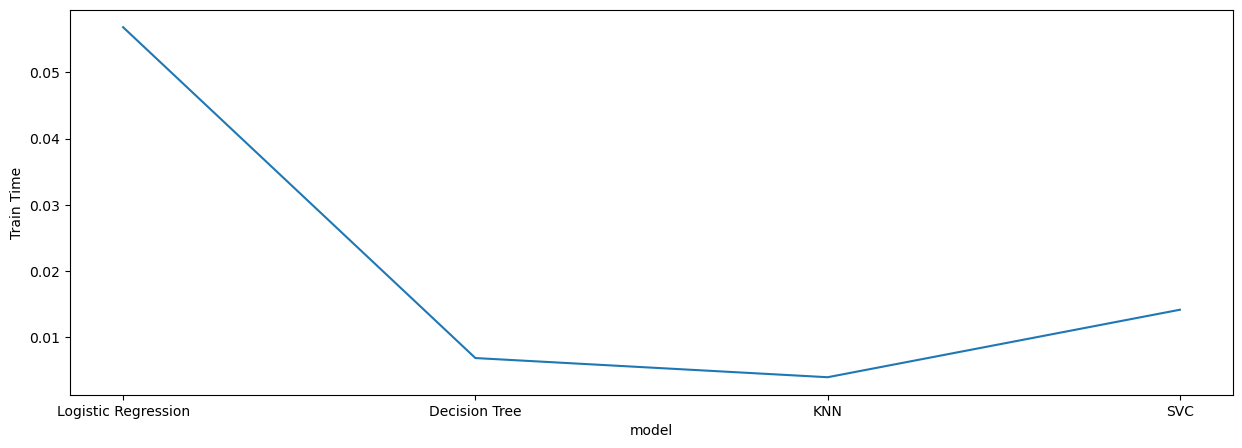

In [111]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(data=res_def1, x="model", y="Train Time")

<AxesSubplot:xlabel='model', ylabel='Test Accuracy'>

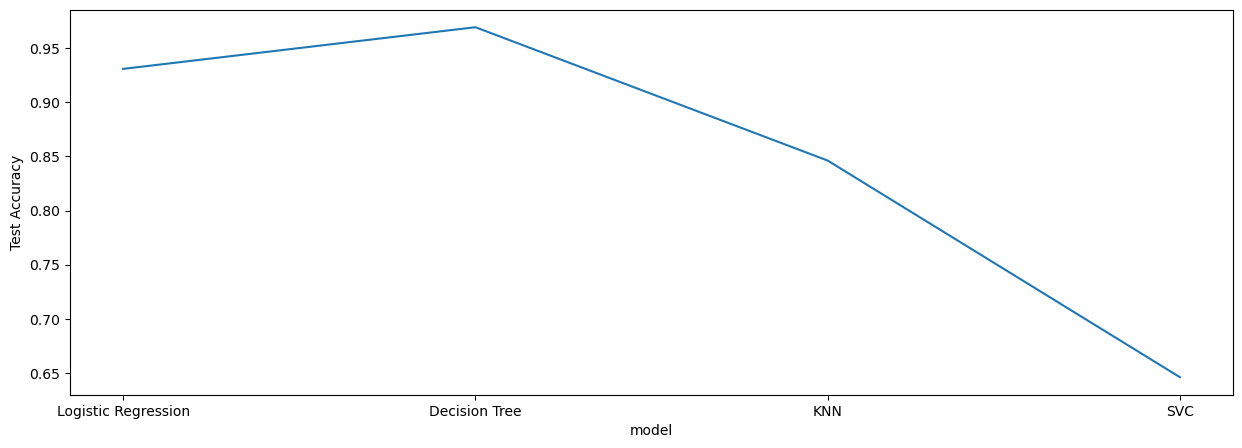

In [112]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(data=res_def1, x="model", y="Test Accuracy")

In [115]:
#Improving the model
#logistic regression with GridSearchCV
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
lrg_grid_search = GridSearchCV(estimator = LogisticRegression(max_iter=1000),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0).fit(X_train, y_train)

lrg_grid_train_acc = lrg_grid_search.score(X_train, y_train)
lrg_grid_test_acc = lrg_grid_search.score(X_test, y_test)
lrg_grid_best_params = lrg_grid_search.best_params_
lrg_grid_mean_fit_time = np.mean(lrg_grid_search.cv_results_['mean_fit_time'])
print(f'Training Accuracy: {lrg_grid_train_acc: .2f}')
print(f'Test Accuracy: {lrg_grid_test_acc: .2f}')
print(f'Best parameters : {lrg_grid_best_params}')
print(f'Mean Fit Time: {lrg_grid_mean_fit_time}')

Training Accuracy:  0.94
Test Accuracy:  0.92
Best parameters : {'solver': 'sag'}
Mean Fit Time: 0.05341276388901931


In [116]:
# Analysing the classification report
y_hat_train = lrg_grid_search .predict(X_train)
y_hat_test = lrg_grid_search .predict(X_test)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        46
           1       0.95      0.93      0.94        84

    accuracy                           0.92       130
   macro avg       0.91      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130



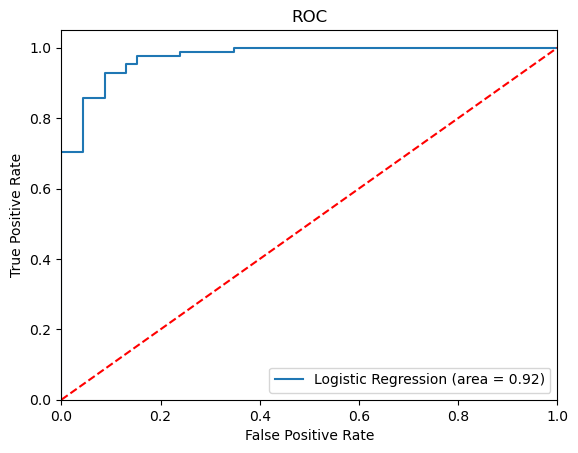

In [117]:
logit_roc_auc = roc_auc_score(y_test, lrg_grid_search .predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lrg_grid_search .predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[-0.05787507  1.69438419  2.38965677  2.38881832  1.02568126  0.34652354
  0.43484957  1.1245732   0.83962474 -0.94823304  1.3329939  -0.42047281
  1.08015335 -0.12073653 -0.07525511 -0.20320892]


<AxesSubplot:>

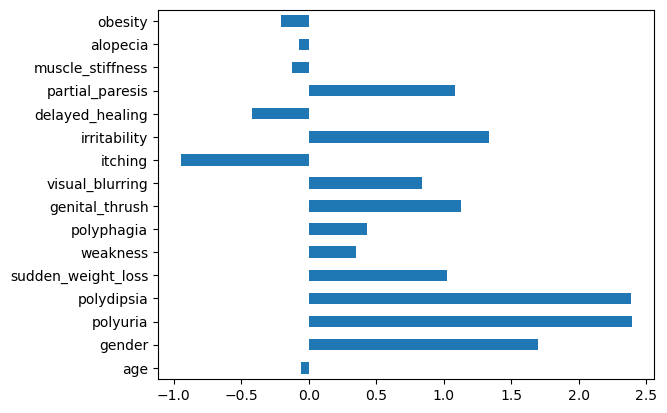

In [118]:
#interpreting logistic regression model
importance = lrg_grid_search.best_estimator_.coef_[0]
print (importance)
# plot feature importance
pd.Series(importance,index=df.columns.drop('class')).plot(kind='barh') 

In [119]:
#Decision Tree with GridSearchCV
params = {'max_depth': list(range(1, 12)),
         'min_samples_split': [0.1, 0.2, 0.05],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [0.1, 0.2, 0.05]
         }
decision_grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)
grid_train_acc = decision_grid_search.score(X_train, y_train)
grid_test_acc = decision_grid_search.score(X_test, y_test)
best_params = decision_grid_search.best_params_
dec_mean_fit_time = np.mean(decision_grid_search.cv_results_['mean_fit_time'])
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')
print(f'Mean Fit Time: {dec_mean_fit_time}')

Training Accuracy:  0.87
Test Accuracy:  0.87
Best parameters of tree: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
Mean Fit Time: 0.0025307214621341587


In [120]:
# Analysing the classification report
y_hat_dec_train = decision_grid_search.predict(X_train)
y_hat_dec_test = decision_grid_search.predict(X_test)
print(classification_report(y_test, y_hat_dec_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        46
           1       0.89      0.90      0.90        84

    accuracy                           0.87       130
   macro avg       0.86      0.85      0.86       130
weighted avg       0.87      0.87      0.87       130



[-0.05787507  1.69438419  2.38965677  2.38881832  1.02568126  0.34652354
  0.43484957  1.1245732   0.83962474 -0.94823304  1.3329939  -0.42047281
  1.08015335 -0.12073653 -0.07525511 -0.20320892]


<AxesSubplot:>

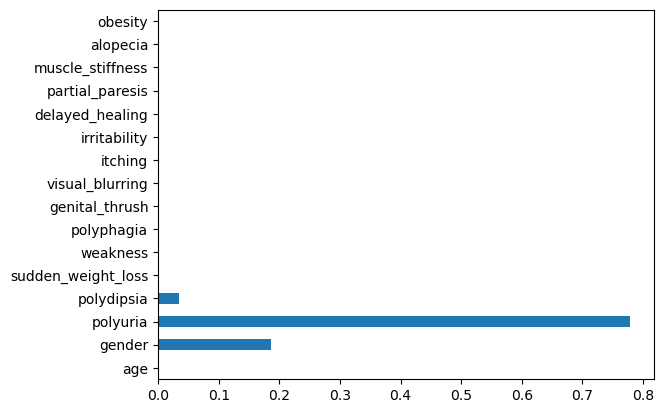

In [121]:
#interpreting Decision tree model
importances = decision_grid_search.best_estimator_.feature_importances_
print (importance)
# plot feature importance
pd.Series(importances,index=df.columns.drop('class')).plot(kind='barh')

In [122]:
#KNN with GridSearchCV
knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

param_grid = {'knn__n_neighbors': list(range(3, 31, 2))}
knn_grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy').fit(X_train, y_train)

knn_train_acc = knn_grid_search.score(X_train, y_train)
knn_test_acc = knn_grid_search.score(X_test, y_test)
knn_best_params = knn_grid_search.best_params_
knn_mean_fit_time = np.mean(knn_grid_search.cv_results_['mean_fit_time'])
print(f'Training Accuracy: {knn_train_acc: .2f}')
print(f'Test Accuracy: {knn_test_acc: .2f}')
print(f'Best parameters: {knn_best_params}')
print(f'Mean Fit Time: {knn_mean_fit_time}')

Training Accuracy:  0.97
Test Accuracy:  0.92
Best parameters: {'knn__n_neighbors': 3}
Mean Fit Time: 0.004403536660330636


In [123]:
# Analysing the classification report
y_hat_knn_train = knn_grid_search.predict(X_train)
y_hat_knn_test = knn_grid_search.predict(X_test)
print(classification_report(y_test, y_hat_knn_test))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        46
           1       0.97      0.89      0.93        84

    accuracy                           0.92       130
   macro avg       0.90      0.92      0.91       130
weighted avg       0.92      0.92      0.92       130



In [124]:
#SVC with GridSearchCV
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}
svc = SVC().fit(X_train, y_train)

svc_grid_search = GridSearchCV(svc, param_grid=params).fit(X_train, y_train)
svc_train_acc = svc_grid_search.score(X_train, y_train)
svc_test_acc = svc_grid_search.score(X_test, y_test)
svc_best_params = svc_grid_search.best_params_
svc_mean_fit_time = np.mean(svc_grid_search.cv_results_['mean_fit_time'])
print(f'Training Accuracy: {svc_train_acc: .2f}')
print(f'Test Accuracy: {svc_test_acc: .2f}')
print(f'Best parameters: {svc_best_params}')
print(f'Mean Fit Time: {svc_mean_fit_time}')

Training Accuracy:  0.93
Test Accuracy:  0.92
Best parameters: {'kernel': 'linear'}
Mean Fit Time: 0.012382912635803224


In [125]:
# Analysing the classification report
y_hat_svc_train = svc_grid_search.predict(X_train)
y_hat_svc_test = svc_grid_search.predict(X_test)
print(classification_report(y_test, y_hat_svc_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.94      0.94      0.94        84

    accuracy                           0.92       130
   macro avg       0.92      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130



In [126]:
#summarizing results
results_df = ''


res_dict1 = {'model': ['Logistic Regression','Decision Tree', 'KNN','SVC'],
            'Training Accuracy': [lrg_grid_train_acc, grid_train_acc,knn_train_acc,svc_train_acc],
            'Test Accuracy': [lrg_grid_test_acc,grid_test_acc,knn_test_acc,svc_test_acc],
            'Best parameters': [lrg_grid_best_params, best_params,knn_best_params,svc_best_params],
            'Mean Fit Time':[lrg_grid_mean_fit_time,dec_mean_fit_time,knn_mean_fit_time,svc_mean_fit_time]}
results_df = pd.DataFrame(res_dict1).set_index('model')
results_df

,Training Accuracy,Test Accuracy,Best parameters,Mean Fit Time
model,,,,
Logistic Regression,0.938462,0.923077,{'solver': 'sag'},0.053413
Decision Tree,0.871795,0.869231,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.002531
KNN,0.971795,0.915385,{'knn__n_neighbors': 3},0.004404
SVC,0.933333,0.923077,{'kernel': 'linear'},0.012383


<AxesSubplot:xlabel='model', ylabel='Mean Fit Time'>

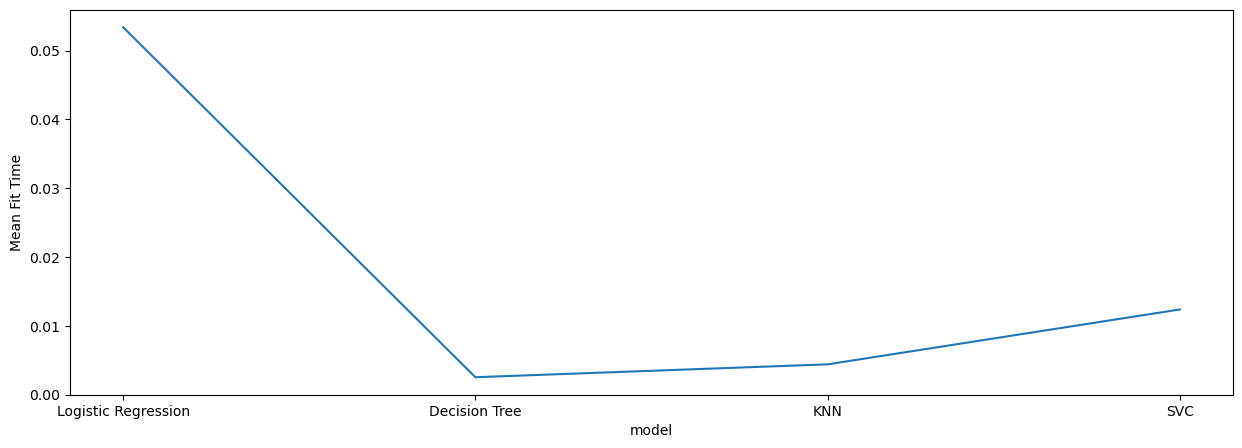

In [127]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(data=results_df, x="model", y="Mean Fit Time")

<AxesSubplot:xlabel='model', ylabel='Test Accuracy'>

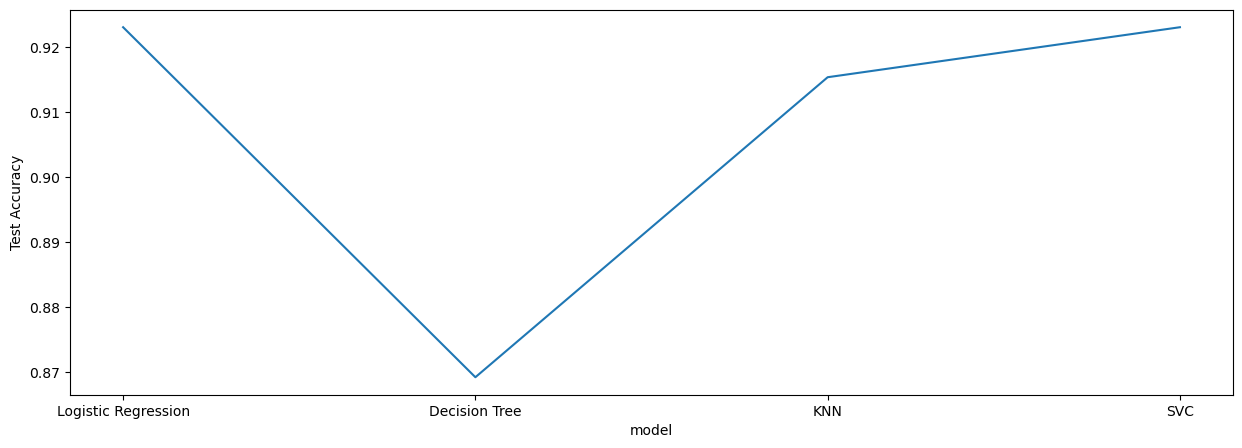

In [128]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(data=results_df, x="model", y="Test Accuracy")